# Model Perfomance Metrics

- Regression Models
    - R2
    - Residual Sum of Squares (RSS)
    - Mean Squared Error (MSE)
    - Mean Absolute Error (MAE)
    - Median Absolute Error / Median Absolute Deviation (MAD)
    - Root mean squared error (RMSE)
    - Explained variance score

Once we've built a model, it's important to understand how well it works. To do so, we evaluate the model against one or more metrics.

## Regression Models

In [14]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [6]:
np.random.seed(42)

# Np.newaxis comes in very handy when you want to explicitly convert an 1D array 
# to either a row vector or a column vector.

X = (np.array(sorted(list(range(5))*20)) 
     + np.random.normal(size=100, scale=0.5))[:, np.newaxis]

y = (np.array(sorted(list(range(5))*20)) 
     + np.random.normal(size=100, scale=0.25))[:, np.newaxis]

In [7]:
X

array([[ 0.24835708],
       [-0.06913215],
       [ 0.32384427],
       [ 0.76151493],
       [-0.11707669],
       [-0.11706848],
       [ 0.78960641],
       [ 0.38371736],
       [-0.23473719],
       [ 0.27128002],
       [-0.23170885],
       [-0.23286488],
       [ 0.12098114],
       [-0.95664012],
       [-0.86245892],
       [-0.28114376],
       [-0.50641556],
       [ 0.15712367],
       [-0.45401204],
       [-0.70615185],
       [ 1.73282438],
       [ 0.88711185],
       [ 1.0337641 ],
       [ 0.28762591],
       [ 0.72780864],
       [ 1.05546129],
       [ 0.42450321],
       [ 1.18784901],
       [ 0.69968066],
       [ 0.85415313],
       [ 0.69914669],
       [ 1.92613909],
       [ 0.99325139],
       [ 0.47114454],
       [ 1.41127246],
       [ 0.38957818],
       [ 1.1044318 ],
       [ 0.02016494],
       [ 0.33590698],
       [ 1.09843062],
       [ 2.36923329],
       [ 2.08568414],
       [ 1.94217586],
       [ 1.84944815],
       [ 1.260739  ],
       [ 1

In [8]:
y

array([[-0.35384269],
       [-0.10516133],
       [-0.08567863],
       [-0.20056932],
       [-0.04032143],
       [ 0.10101271],
       [ 0.47154648],
       [ 0.04364445],
       [ 0.0643876 ],
       [-0.01861148],
       [-0.4796928 ],
       [-0.00662847],
       [ 0.01505755],
       [ 0.61581053],
       [-0.04809024],
       [ 0.07538684],
       [-0.00867794],
       [-0.29216951],
       [ 0.2857057 ],
       [ 0.18798326],
       [ 1.19775799],
       [ 0.77265314],
       [ 1.35069858],
       [ 0.64953723],
       [ 1.14671427],
       [ 1.54761391],
       [ 0.75236592],
       [ 0.85842557],
       [ 1.02491284],
       [ 0.87413109],
       [ 0.61233414],
       [ 1.01714074],
       [ 0.73442407],
       [ 1.11839811],
       [ 0.77014394],
       [ 1.3874836 ],
       [ 0.80418668],
       [ 0.91948462],
       [ 1.2033793 ],
       [ 0.69228392],
       [ 2.05686498],
       [ 2.32678569],
       [ 1.59812919],
       [ 2.04615846],
       [ 2.0649707 ],
       [ 2

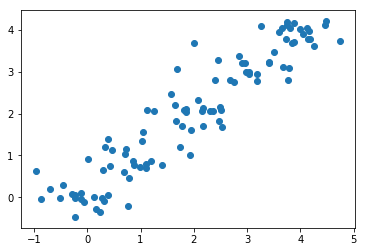

In [16]:
plt.scatter(X,y);

In [18]:
clf = LinearRegression()
clf.fit(X, y)
y_pred = clf.predict(y)

### R2 (R squared)

The first and most immediately useful metric to use in regression is the **R2**, also known as the **coefficient of determination**. 

<img src="images/metric_rsquared.png" alt="" style="width: 800px;"/>

From: [Model Fit Metrics](https://www.kaggle.com/residentmario/model-fit-metrics/)

The **coefficient of determination** is a measure of how well future samples will be predicted by the model. `The best possible score is 1. A constant model which always predicts the average will recieve a score of 0.` A model which is arbitrarily worse than an averaging model will recieve a negative score (this shouldn't happen in practice obviously!).

In practice, it is a "best default" model score: other metrics may be better to use, depending on what you are optimizing for, but the  R2  is just generally very good, and should be the first number you look at in most cases.

R2 is such a popular metric that there are artificial R2 scores, designed to work in a similar way but with completely different underlying mathematics, which are defined for other non-regression operations.

In [21]:
def r2_score(y, y_pred):
    n = len(y)
    y_avg = (1 / n) * np.sum(y) # y bar
    pred_error = np.sum((y - y_pred)**2)
    avg_error = np.sum((y - y_avg)**2)
    return 1 - pred_error / avg_error

r2_score(y, y_pred)

0.9846558399170495

In [22]:
from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.9846558399170495

### Residual Sum of Squares (RSS)

The **residual sum of squares** is the top term in the  R2  metric (albeit adjusted by 1 to account for degrees of freedom). It takes the distance between observed and predicted values (the **residuals**), squares them, and sums them all together. Ordinary least squares regression is designed to minimize exactly this value.

<img src="images/metric_rss.png" alt="" style="width: 800px;"/>

From: [Model Fit Metrics](https://www.kaggle.com/residentmario/model-fit-metrics/)

RSS is not very interpretable on its own, because it is the sum of many (potentially very large) residuals. For this reason it is rarely used as a metric, but because it is so important to regression, it's often included in statistical fit assays.

In [23]:
def rss_score(y, y_pred):
    return np.sum((y - y_pred)**2)

rss_score(y, y_pred)

3.147418578949139

### Mean Squared Error (MSE)

**Mean squared error** is the interpretable version of RSS. MSE divides RSS (again adjusted be 1, to account for degrees of freedom) by the number of samples in the dataset to arrive at the average amount of squared error in the model:

<img src="images/metric_mse.png" alt="" style="width: 800px;"/>

From: [Model Fit Metrics](https://www.kaggle.com/residentmario/model-fit-metrics/)

This is easily interpretable, because it makes a lot of intrinsic sense. Ordinary least squares regression asks that we minimize quadratic error; MSE measures, on average, how much such error is left in the model. However, due to the squaring involved, it is not very robust against outliers.

In [24]:
def mean_squared_error(y, y_pred):
    return (1 / len(y)) * np.sum((y - y_pred)**2)

mean_squared_error(y, y_pred)

0.03147418578949139

In [25]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_pred)

0.03147418578949139

### Mean Absolute Error (MAE)

**Mean absolute error** computes the expected absolute error (or L1-norm loss). Because it involves means, not squared residuals, mean absolute error is more resistant to outliers than MSE is.

<img src="images/metric_mae.png" alt="" style="width: 800px;"/>

From: [Model Fit Metrics](https://www.kaggle.com/residentmario/model-fit-metrics/)

In [26]:
def mean_absolute_error(y, y_pred):
    return (1 / len(y)) * np.sum(np.abs(y - y_pred))
    
mean_absolute_error(y, y_pred)

0.15371923162949003

In [27]:
from sklearn.metrics import mean_absolute_error   
mean_absolute_error(y, y_pred)

0.15371923162949003

### Median Absolute Error / Median Absolute Deviation (MAD)

**Median absolute error** is the most resistant metric to outliers that's possible using simple methods.

<img src="images/metric_mad.png" alt="" style="width: 800px;"/>

From: [Model Fit Metrics](https://www.kaggle.com/residentmario/model-fit-metrics/)

In [28]:
def median_absolute_error(y, y_pred):
    return np.median(np.abs(y - y_pred))
    
mean_absolute_error(y, y_pred)

0.15371923162949003

In [29]:
from sklearn.metrics import median_absolute_error
median_absolute_error(y, y_pred)

0.15514813323997423

### Root mean squared error (RMSE)

**Root mean squared error** is an error metric that's popular in the literature. It is defined as the square root of mean squared error:

<img src="images/metric_rmse.png" alt="" style="width: 800px;"/>

From: [Model Fit Metrics](https://www.kaggle.com/residentmario/model-fit-metrics/)

`RMSE is directly comparable to, and serves a similar role as, the MAE, mean absolute error`.

The computational effect is that RMSE is less resistant to outliers, and thus reports a poorer-fitting model when outliers are not properly accounted for. This is considered a good thing when doing cetain things, like performing hyperparameter searches. However, `MAE is a more useful reporting statistic because MAE is interpretable, while RMSE is not`.

In [31]:
def root_mean_squared_error(y, y_pred):
    return np.sqrt((1 / len(y)) * np.sum((y - y_pred)**2))

root_mean_squared_error(y, y_pred)

0.17740965528823788

### Explained variance score

The **explained variance score** is a very clever (IMO) metric which looks at the ratio between the variance of the model/truth differences and the variance of the ground truth alone:

<img src="images/metric_evs.png" alt="" style="width: 800px;"/>

From: [Model Fit Metrics](https://www.kaggle.com/residentmario/model-fit-metrics/)

Hence the moniker "explained variance". `The best possible score is 1 (all variance is explained)` and the score goes down from there. 

In [32]:
def explained_variance_score(y, y_pred):
    return 1 - (np.var(y - y_pred) / np.var(y))

explained_variance_score(y, y_pred)

0.9859076890259523

In [33]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y, y_pred)

0.9859076890259523

## Resources

- [Model Fit Metrics](https://www.kaggle.com/residentmario/model-fit-metrics/)
- [np.newaxis](https://medium.com/@ian.dzindo01/what-is-numpy-newaxis-and-when-to-use-it-8cb61c7ed6ae)